# ******     The Sparks Foundation     ******

# Task 1 : Prediction Using Supervised Machine Learning

# Predict the percentage of an student based on the number of study hours.

# Objectives :

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied by using Simple Linear Regression.







# Author: Vidya Dwaraka Sahani

In [2]:
# Importing Required Libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

#Libraries for model building

import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split

In [7]:
# Reading data from remote link

df='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(df)


In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for Outliers

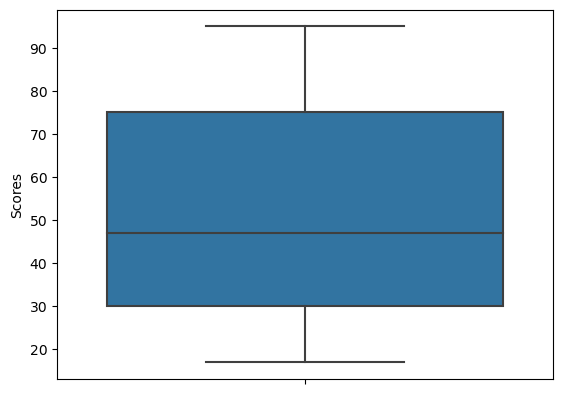

In [13]:
sns.boxplot(y='Scores',data=data)
plt.show()

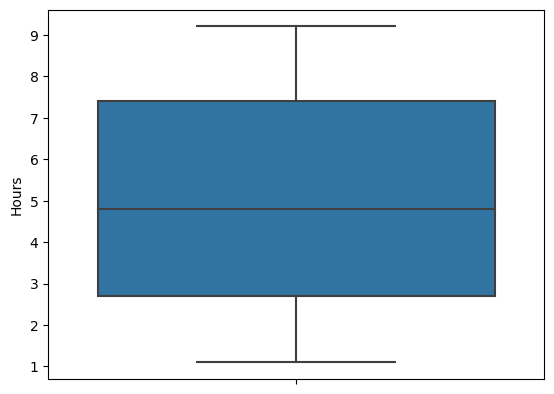

In [15]:
sns.boxplot(y='Hours',data=data)
plt.show()

# As we can see above there is no outliers presents in out data set

In [16]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


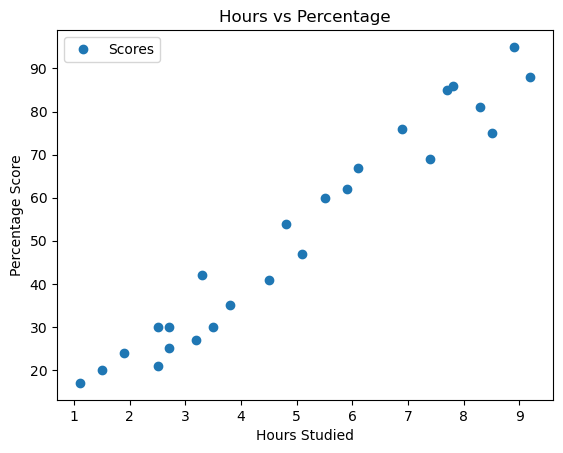

In [18]:
# Plotting 2D the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Interpretation

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.





In [19]:
#To find the correlation between the study hours and the percentage scores

data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation between the Hours and Scores is 0.9761 so the both variables are highly correlated with each other.

# Data Partition

In [29]:
X=data[['Hours']]
y=data[['Scores']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [30]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


# Building a Model

Hypothesis Testing

H0 = There is no relationship between the Hours & Scores

H1 = There is relationship between the Hours & Scores

Alpha =5% ( 0.05 )

In [31]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=train).fit()
model.summary()

C:\Users\manoj\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.15e-11
Time:                        16:39:09   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

We Rejected HO

See there is relationship between the Score & Hours studied

Accuracy of Model is 95.7%, So Model is fitting good


Y = 1.4951 + 9.8717 * Hours

In [32]:
train['fitted_value']=model.fittedvalues # prediction  or fitted value
train['residual']=model.resid  # error or residual

train.head()

,Hours,Scores,fitted_value,residual
6,9.2,88,92.314915,-4.314915
12,4.5,41,45.917857,-4.917857
4,3.5,30,36.046143,-6.046143
24,7.8,86,78.494515,7.505485
0,2.5,21,26.174428,-5.174428


# Prediction on Test Data [unseen data]

In [33]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
9,2.7,25
22,3.8,35
13,3.3,42
11,5.9,62
5,1.5,20


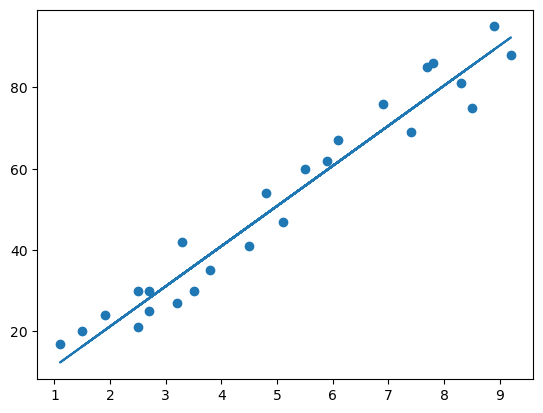

In [34]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)

plt.plot(X, line)

plt.show()


In [35]:
test['Predicted']=model.predict(test)
test

,Hours,Scores,Predicted
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714
19,7.4,69,74.545829
23,6.9,76,69.609972
21,4.8,54,48.879371


# Evaluating the model

# TEST

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Scores, test.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.93


# TRAIN


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Scores, train.fitted_value)
print('R2 score for perfect model is', np.round(r2,2))

R2 score for perfect model is 0.96


In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test.Scores,test.Predicted))

Mean Absolute Error: 4.762517892332273


# Model is good fit 

# Performance on Test data is also Looking good fit

# Let's check What will be predicted score if a student studies for 9.25 hrs/ day 

In [41]:
live['Score_Prediction']=np.round(model.predict(live))
live

,live,Hours,Score_Prediction
0,student1,9.25,93.0


# We can see that prediction score is 93% if a student studied 9.25hrs/day

# !!!!!!!!!!......Thank You......!!!!!!!!!